# Find me a cluster

One solution. You may have yours.

In [1]:
import geopandas as gpd
import seaborn as sns
from libpysal import graph
from sklearn import cluster, preprocessing

In [2]:
chicago = gpd.read_file(
    "https://martinfleischmann.net/sds/clustering/data/chicago_influenza_1918.geojson"
)

Before working with clustering, do you remember that note about data
standardisation? The demographic variables in the table are not using
the same scale, so you need to do something about it before using
K-means.

In [3]:
demographics = [
    "gross_acres",
    "illit",
    "unemployed_pct",
    "ho_pct",
    "agecat1",
    "agecat2",
    "agecat3",
    "agecat4",
    "agecat5",
    "agecat6",
    "agecat7",
]
chicago[demographics] = preprocessing.robust_scale(chicago[demographics])
chicago.head(2)

If you check the values now, you will see that they are all distributed
around 0.

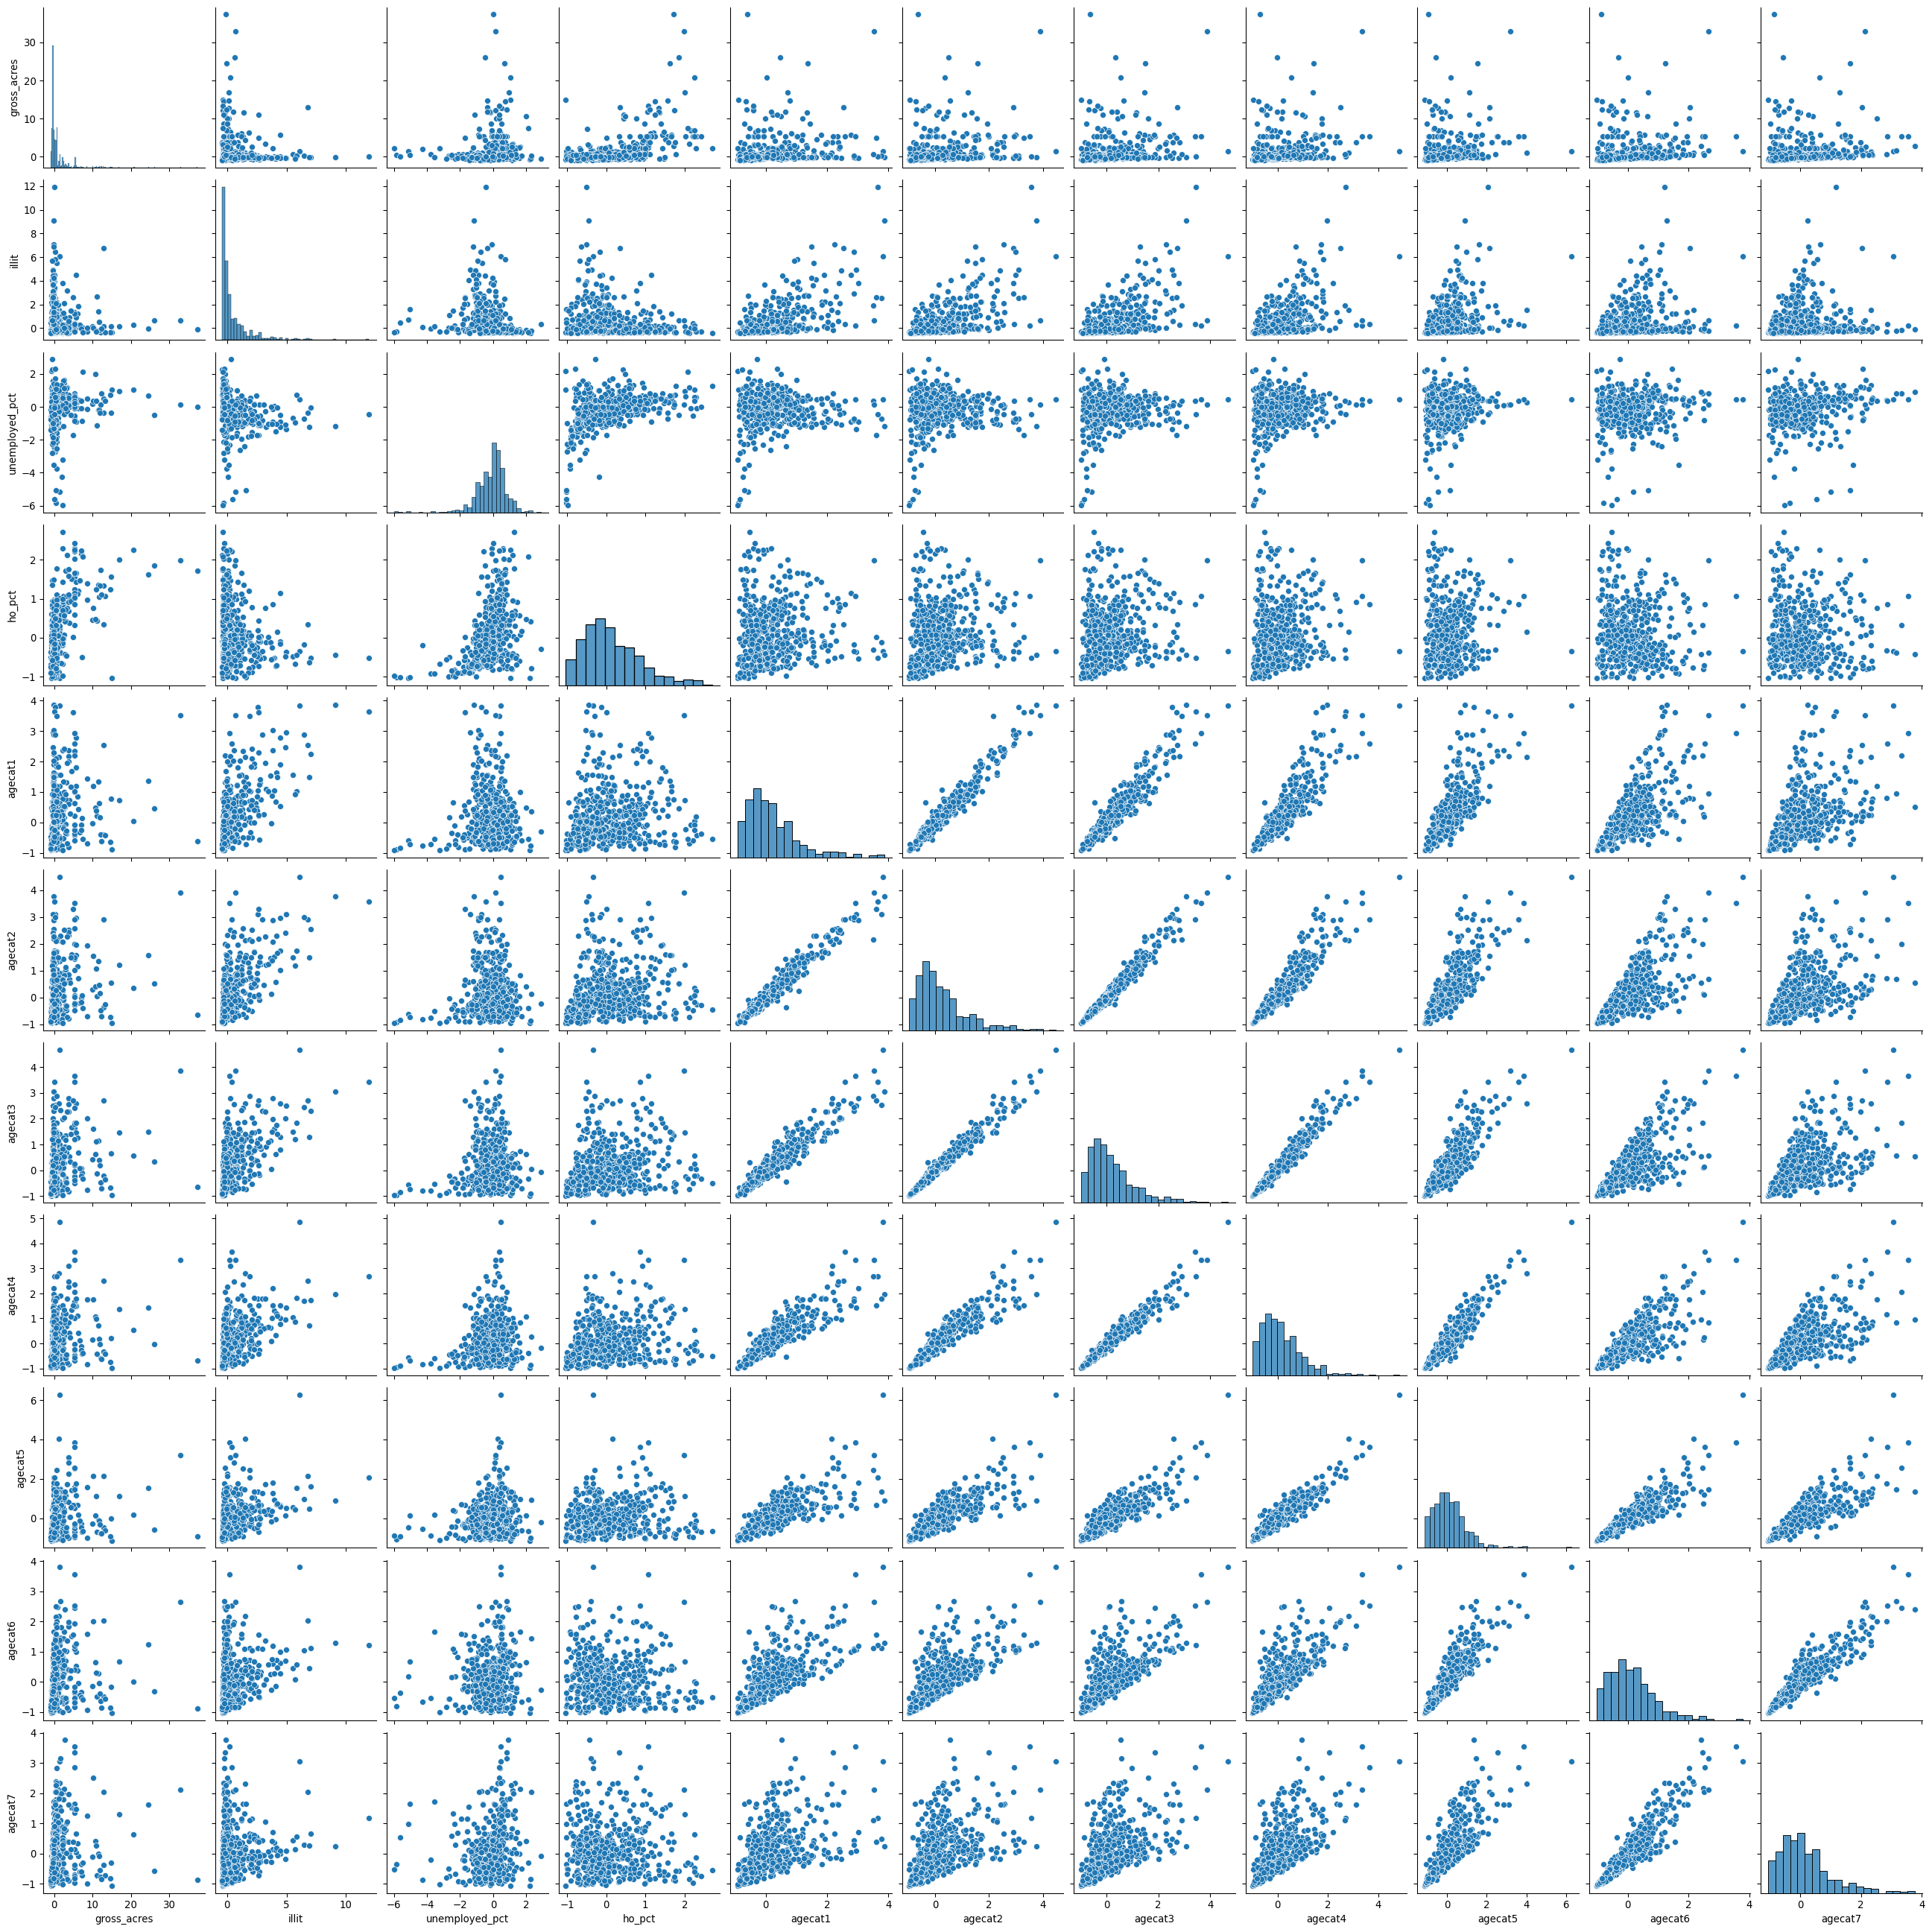

In [4]:
_ = sns.pairplot(chicago[demographics])

Pick a number of clusters

In [5]:
n_clusters = 4

Run K-Means for that number of clusters

In [6]:
kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0, n_init=1000)
kmeans.fit(chicago[demographics])

KMeans(n_clusters=4, n_init=1000, random_state=0) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   KMeans ? Documentation for KMeans i Fitted KMeans(n_clusters=4, n_init=1000, random_state=0)

Plot the different clusters on a map

In [7]:
chicago["cluster"] = kmeans.labels_

chicago.explore("cluster", categorical=True)

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_9818f39bd45f548e1ff958519c1dcb4a {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
 <script>$( function() {
 $( ".maplegend" ).draggable({
 start: function (event, ui) {
 $(this).css({
 right: "auto",
 top: "auto",
 bottom: "auto"
 });
 }
 });
 });
 </script>
 <style type='text/css'>
 .maplegend {
 position: absolute;
 z-index:9999;
 background-color: rgba(255, 255, 255, .8);
 border-radius: 5px;
 box-shadow: 0 0 15px rgba(0,0,0,0.2);
 padding: 10px;
 font: 12px/14px Arial, Helvetica, sans-serif;
 right: 10px;
 bottom: 20px;
 }
 .maplegend .legend-title {
 text-align: left;
 margin-bottom: 5px;
 font-weight: bold;
 }
 .maplegend .legend-scale ul {
 margin: 0;
 margin-bottom: 0px;
 padding: 0;
 float: left;
 list-style: none;
 }
 .maplegend .legend-scale ul li {
 list-style: none;
 margin-left: 0;
 line-height: 16px;
 margin-bottom: 2px;
 }
 .maplegend ul.legend-labels li span {
 display: block;
 float: left;
 height: 14px;
 width: 14px;
 margin-right: 5px;
 margin-left: 0;
 border: 0px solid #ccc;
 }
 .maplegend .legend-source {
 color: #777;
 clear: both;
 }
 .maplegend a {
 color: #777;
 }
 </style>
 
</head>
<body>
 
 
 <div id='maplegend cluster' class='maplegend'>
 <div class='legend-title'>cluster</div>
 <div class='legend-scale'>
 <ul class='legend-labels'>
 <li><span style='background:#1f77b4'></span>0</li>
 <li><span style='background:#d62728'></span>1</li>
 <li><span style='background:#f7b6d2'></span>2</li>
 <li><span style='background:#9edae5'></span>3</li>
 </ul>
 </div>
 </div>
 
 
 <div class="folium-map" id="map_9818f39bd45f548e1ff958519c1dcb4a" ></div>
 
</body>
<script>
 
 
 var map_9818f39bd45f548e1ff958519c1dcb4a = L.map(
 "map_9818f39bd45f548e1ff958519c1dcb4a",
 {
 center: [41.84028129129861, -87.67299965880729],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_9818f39bd45f548e1ff958519c1dcb4a);

 

 
 
 var tile_layer_5ae7b16b54224c893b550996c4d50b66 = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026cop

Analyse the results: - What do you find? - What are the main
characteristics of each cluster? - How are clusters distributed
geographically? - Can you identify some groups concentrated on
particular areas?

In [8]:
groups = chicago.groupby('cluster')
groups.size()

cluster
0    356
1     36
2     99
3      5
dtype: int64

In [9]:
groups[demographics].mean().T

Create spatially lagged K-Means.

In [10]:
queen = graph.Graph.build_contiguity(chicago).transform("r")

for column in demographics:
    chicago[column + "_lag"] = queen.lag(chicago[column])

demographics_spatial = demographics + [column + "_lag" for column in demographics]

kmeans_lag = cluster.KMeans(n_clusters=n_clusters, random_state=42, n_init=1000)
kmeans_lag.fit(chicago[demographics_spatial])

chicago["cluster_lag"] = kmeans_lag.labels_

chicago.explore("cluster_lag", categorical=True)

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_a582c7375838d12050e5faac30875947 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
 <script>$( function() {
 $( ".maplegend" ).draggable({
 start: function (event, ui) {
 $(this).css({
 right: "auto",
 top: "auto",
 bottom: "auto"
 });
 }
 });
 });
 </script>
 <style type='text/css'>
 .maplegend {
 position: absolute;
 z-index:9999;
 background-color: rgba(255, 255, 255, .8);
 border-radius: 5px;
 box-shadow: 0 0 15px rgba(0,0,0,0.2);
 padding: 10px;
 font: 12px/14px Arial, Helvetica, sans-serif;
 right: 10px;
 bottom: 20px;
 }
 .maplegend .legend-title {
 text-align: left;
 margin-bottom: 5px;
 font-weight: bold;
 }
 .maplegend .legend-scale ul {
 margin: 0;
 margin-bottom: 0px;
 padding: 0;
 float: left;
 list-style: none;
 }
 .maplegend .legend-scale ul li {
 list-style: none;
 margin-left: 0;
 line-height: 16px;
 margin-bottom: 2px;
 }
 .maplegend ul.legend-labels li span {
 display: block;
 float: left;
 height: 14px;
 width: 14px;
 margin-right: 5px;
 margin-left: 0;
 border: 0px solid #ccc;
 }
 .maplegend .legend-source {
 color: #777;
 clear: both;
 }
 .maplegend a {
 color: #777;
 }
 </style>
 
</head>
<body>
 
 
 <div id='maplegend cluster_lag' class='maplegend'>
 <div class='legend-title'>cluster_lag</div>
 <div class='legend-scale'>
 <ul class='legend-labels'>
 <li><span style='background:#1f77b4'></span>0</li>
 <li><span style='background:#d62728'></span>1</li>
 <li><span style='background:#f7b6d2'></span>2</li>
 <li><span style='background:#9edae5'></span>3</li>
 </ul>
 </div>
 </div>
 
 
 <div class="folium-map" id="map_a582c7375838d12050e5faac30875947" ></div>
 
</body>
<script>
 
 
 var map_a582c7375838d12050e5faac30875947 = L.map(
 "map_a582c7375838d12050e5faac30875947",
 {
 center: [41.84028129129861, -87.67299965880729],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_a582c7375838d12050e5faac30875947);

 

 
 
 var tile_layer_0e59275f08e68fd897d4f0a9f319e96b = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\

Develop a regionalisation using agglomerative clustering

In [11]:
agg = cluster.AgglomerativeClustering(n_clusters=n_clusters, connectivity=queen.sparse)
agg.fit(chicago[demographics])

AgglomerativeClustering(connectivity=<Compressed Sparse Row sparse array of dtype 'float64'
 with 2274 stored elements and shape (496, 496)>,
 n_clusters=4) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   AgglomerativeClustering ? Documentation for AgglomerativeClustering i Fitted AgglomerativeClustering(connectivity=<Compressed Sparse Row sparse array of dtype 'float64'
 with 2274 stored elements and shape (496, 496)>,
 n_clusters=4)

In [12]:
chicago["cluster_agg"] = agg.labels_

chicago.explore("cluster_agg", categorical=True)

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_15417a976bfcd51cc925b942878121e6 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
 <script>$( function() {
 $( ".maplegend" ).draggable({
 start: function (event, ui) {
 $(this).css({
 right: "auto",
 top: "auto",
 bottom: "auto"
 });
 }
 });
 });
 </script>
 <style type='text/css'>
 .maplegend {
 position: absolute;
 z-index:9999;
 background-color: rgba(255, 255, 255, .8);
 border-radius: 5px;
 box-shadow: 0 0 15px rgba(0,0,0,0.2);
 padding: 10px;
 font: 12px/14px Arial, Helvetica, sans-serif;
 right: 10px;
 bottom: 20px;
 }
 .maplegend .legend-title {
 text-align: left;
 margin-bottom: 5px;
 font-weight: bold;
 }
 .maplegend .legend-scale ul {
 margin: 0;
 margin-bottom: 0px;
 padding: 0;
 float: left;
 list-style: none;
 }
 .maplegend .legend-scale ul li {
 list-style: none;
 margin-left: 0;
 line-height: 16px;
 margin-bottom: 2px;
 }
 .maplegend ul.legend-labels li span {
 display: block;
 float: left;
 height: 14px;
 width: 14px;
 margin-right: 5px;
 margin-left: 0;
 border: 0px solid #ccc;
 }
 .maplegend .legend-source {
 color: #777;
 clear: both;
 }
 .maplegend a {
 color: #777;
 }
 </style>
 
</head>
<body>
 
 
 <div id='maplegend cluster_agg' class='maplegend'>
 <div class='legend-title'>cluster_agg</div>
 <div class='legend-scale'>
 <ul class='legend-labels'>
 <li><span style='background:#1f77b4'></span>0</li>
 <li><span style='background:#d62728'></span>1</li>
 <li><span style='background:#f7b6d2'></span>2</li>
 <li><span style='background:#9edae5'></span>3</li>
 </ul>
 </div>
 </div>
 
 
 <div class="folium-map" id="map_15417a976bfcd51cc925b942878121e6" ></div>
 
</body>
<script>
 
 
 var map_15417a976bfcd51cc925b942878121e6 = L.map(
 "map_15417a976bfcd51cc925b942878121e6",
 {
 center: [41.84028129129861, -87.67299965880729],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_15417a976bfcd51cc925b942878121e6);

 

 
 
 var tile_layer_f6209cb32cd2a3059bb90a69d1a45acd = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\

Generate a geography that contains only the boundaries of each region
and visualise it.

In [13]:
regions = chicago[["cluster_agg", "geometry"]].dissolve("cluster_agg")
regions.reset_index().explore("cluster_agg", categorical=True)

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_932a04ff5f494142170599119dab09f4 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
 <script>$( function() {
 $( ".maplegend" ).draggable({
 start: function (event, ui) {
 $(this).css({
 right: "auto",
 top: "auto",
 bottom: "auto"
 });
 }
 });
 });
 </script>
 <style type='text/css'>
 .maplegend {
 position: absolute;
 z-index:9999;
 background-color: rgba(255, 255, 255, .8);
 border-radius: 5px;
 box-shadow: 0 0 15px rgba(0,0,0,0.2);
 padding: 10px;
 font: 12px/14px Arial, Helvetica, sans-serif;
 right: 10px;
 bottom: 20px;
 }
 .maplegend .legend-title {
 text-align: left;
 margin-bottom: 5px;
 font-weight: bold;
 }
 .maplegend .legend-scale ul {
 margin: 0;
 margin-bottom: 0px;
 padding: 0;
 float: left;
 list-style: none;
 }
 .maplegend .legend-scale ul li {
 list-style: none;
 margin-left: 0;
 line-height: 16px;
 margin-bottom: 2px;
 }
 .maplegend ul.legend-labels li span {
 display: block;
 float: left;
 height: 14px;
 width: 14px;
 margin-right: 5px;
 margin-left: 0;
 border: 0px solid #ccc;
 }
 .maplegend .legend-source {
 color: #777;
 clear: both;
 }
 .maplegend a {
 color: #777;
 }
 </style>
 
</head>
<body>
 
 
 <div id='maplegend cluster_agg' class='maplegend'>
 <div class='legend-title'>cluster_agg</div>
 <div class='legend-scale'>
 <ul class='legend-labels'>
 <li><span style='background:#1f77b4'></span>0</li>
 <li><span style='background:#d62728'></span>1</li>
 <li><span style='background:#f7b6d2'></span>2</li>
 <li><span style='background:#9edae5'></span>3</li>
 </ul>
 </div>
 </div>
 
 
 <div class="folium-map" id="map_932a04ff5f494142170599119dab09f4" ></div>
 
</body>
<script>
 
 
 var map_932a04ff5f494142170599119dab09f4 = L.map(
 "map_932a04ff5f494142170599119dab09f4",
 {
 center: [41.84028129129861, -87.67299965880729],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_932a04ff5f494142170599119dab09f4);

 

 
 
 var tile_layer_d02d7bc0cb92dafb6fc95f2fa5240447 = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\